In [11]:
from numpy import random

random.seed(10)
int_list = random.randint(10000, size=(5,5)).tolist()
int_list

[[1289, 7293, 1344, 7291, 9372],
 [4829, 1520, 9224, 9289, 6400],
 [5648, 4452, 239, 2443, 2102],
 [3416, 7290, 574, 8036, 9166],
 [6899, 409, 1406, 653, 3932]]

In [13]:
with open("ocr_test.txt", 'w') as output:
    for i in range(len(int_list)):
        for j in range(len(int_list[0])):
            output.write(str(int_list[i][j]).rjust(4,' ') + '\t')
        output.write('\n')

(220, 554)


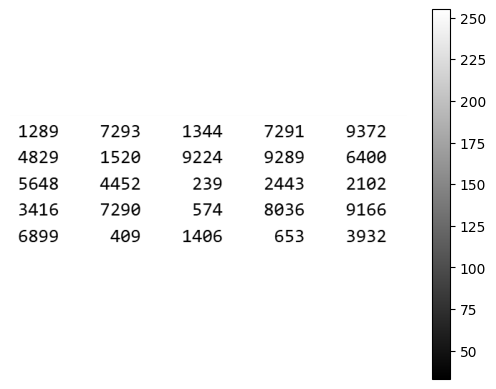

In [86]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ocr_test.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

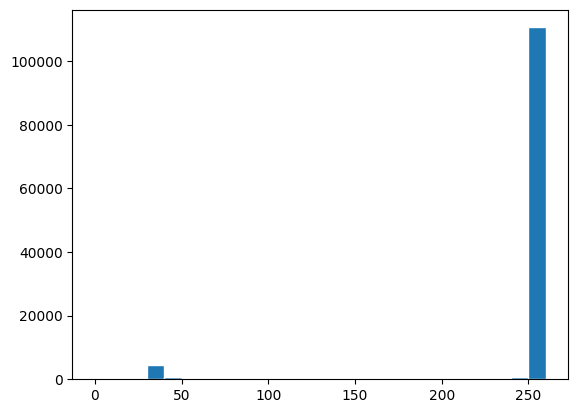

In [97]:
import numpy as np
plt.hist(np.array(img).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

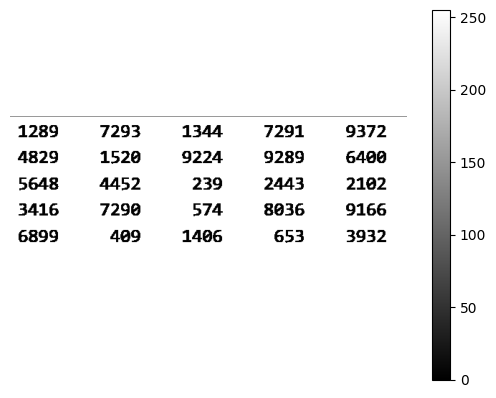

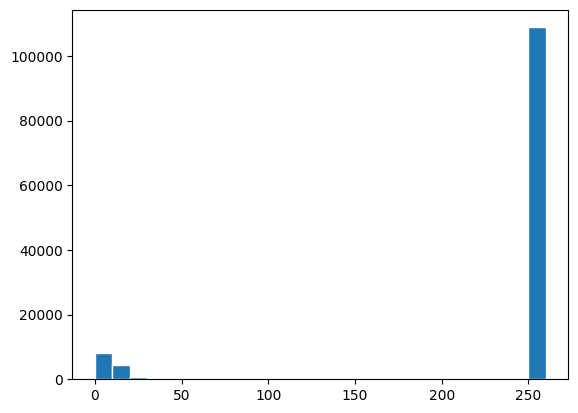

In [98]:
img_equalized = cv2.equalizeHist(img)
plt.imshow(img_equalized, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.show()

plt.hist(np.array(img_equalized).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

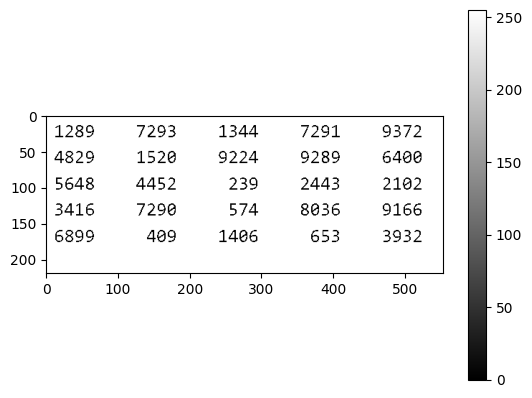

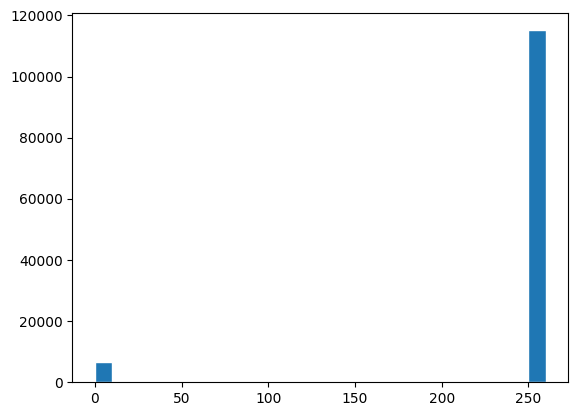

In [96]:
_, binary = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(np.array(binary).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

In [99]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

custom_config = r'--oem 3 --psm 6 outputbase digits'
numbers = pytesseract.image_to_string(img, config=custom_config)
numbers

'1289 7293 1344 7291 9372\n4829 1520 9224 9289 6400\n5648 4452 239 2443 2102\n3416 7298 574 8036 9166\n6899 49 1406 653 3932\n'

In [100]:
numbers.split('\n')

['1289 7293 1344 7291 9372',
 '4829 1520 9224 9289 6400',
 '5648 4452 239 2443 2102',
 '3416 7298 574 8036 9166',
 '6899 49 1406 653 3932',
 '']

In [101]:
n_row = len(numbers.split('\n')) - 1

rows = []
for elem in numbers.split('\n'):
    rows.append(elem.split(' '))
rows

[['1289', '7293', '1344', '7291', '9372'],
 ['4829', '1520', '9224', '9289', '6400'],
 ['5648', '4452', '239', '2443', '2102'],
 ['3416', '7298', '574', '8036', '9166'],
 ['6899', '49', '1406', '653', '3932'],
 ['']]

In [102]:
import pandas as pd
df = pd.DataFrame(rows[:n_row])
df

,0,1,2,3,4
0,1289,7293,1344,7291,9372
1,4829,1520,9224,9289,6400
2,5648,4452,239,2443,2102
3,3416,7298,574,8036,9166
4,6899,49,1406,653,3932


In [104]:
df.to_csv('ocr_test.csv', index=False)